<a href="https://colab.research.google.com/github/hailes1/MCMProjects/blob/main/Monte_Carlo_Optimization_Dag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Optimization

Monte Carlo optimization relies on adaptive random sampling to find the (approximately) minimum or maximum value of a function $f : \Omega \to \mathbb{R}$. Typically such methods are used when the domain $\Omega$ is high-dimensional and possibly very large. In such a situation, it is likely impossible to graph $f$ or to use calculus to find extreme values of $f$.

We will explore an optimization method called *simulated annealing*. The name comes from the *annealing* in metallurgy: the process of heating and cooling a metal to modify its properties.

In [ ]:
import math 
import random
import numpy as np
import matplotlib.pyplot as plt

## A simple example

As a first example, let the domain be $\Omega = \{0, 1, 2, \ldots, 100\}$, and let the function be

$$f(x) = \frac{1}{4}\sin\left(\frac{x}{2}\right) + \frac{(x-40)^2}{500} + 2.$$

We want to find $x \in \Omega$ where $f$ is minimized.


In [ ]:
# domain: {0, 1, ..., 100}
domain = list(range(101))

# function to minimize
def f(x):
  return math.sin(x/2)/4 + (x-40)**2/500 + 2

We will plot $f(x)$ to get some intution about where the minimum value occurs. Remember that in most situations where simulated annealing is used, we *can't* plot $f$.

Text(0, 0.5, 'f(x)')

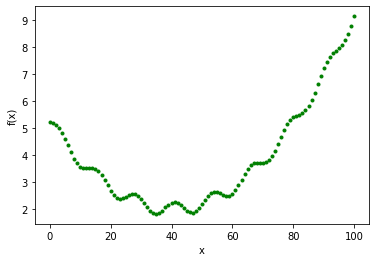

In [ ]:
fvals = [f(x) for x in domain]
plt.plot(domain,fvals,'g.')
plt.xlabel("x")
plt.ylabel("f(x)")

Now we will create a random walk on the domain $\Omega$. Our goal is to make the random walk explore the domain and gravitate toward the values $x$ where $f(x)$ is minimized.

In [ ]:
# Let's Write a function to propose a move, based on the current location
def proposeMove(curr):
  move = random.choice([-3,-2,-1,1,2,3])
  prop = curr + move # proposed move

  #Make sure prop doesn't go off of the domain
  if prop < 0:
    prop = 0
  if prop > 100:
    prop = 100
  return prop


In [ ]:
proposeMove(100)

98

In [ ]:
#function to decided wheather or not to make a proposed move
def doMove(curr, k):
  prop = proposeMove(curr)

  #computer the function value difference 
  df = f(prop) - f(curr)
  #if the proposed location is better then make the move
  if df < 0:
    return prop
  #if the proposed location is worse then we consider making the move and make it with the probability of e^-x/k
  rho = math.exp(-df/k)
  rand = random.random() #random number bettween 0 and 1
  if rand < rho:
    return prop
  #else: don't move
  return curr


In [ ]:
doMove(30,1/2)

33

Final Location: 35
Function Value: 1.8060934986329606
Final k: 4.317124741065784e-05


Text(0, 0.5, 'location')

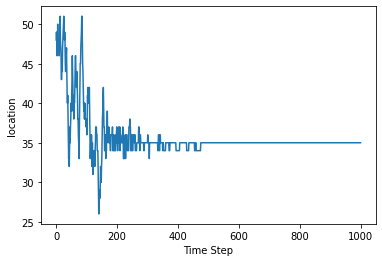

In [ ]:
#simulate the random walk 
numSteps = 1000
k = 1
decFactor = .99 # after evry step multiply k by this decrease factor 

loc = random.randint(0,100) # starting location
history = [loc] # Here is where I can track the locations I have visited
for i in range(numSteps):
  #make a move 
  loc = doMove(loc, k)
  history.append(loc)
  #decrease K a little bit

  k = k * decFactor

# print some results
print("Final Location:", loc)
print("Function Value:", f(loc))
print("Final k:", k)


plt.plot(history)
plt.xlabel("Time Step")
plt.ylabel("location")